In [1]:
import cv2, json, glob, os, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL as pil
from PIL import Image
from tqdm import tqdm

print(cv2.__version__)
print(pil.__version__)

4.7.0
9.2.0


In [2]:
#json, img 파일 제목 리스트화
#일단 탈모 상태 0(양호) / 3(심각)에 해당하는 데이터만 불러옴

dir_1 = glob.glob('./유형별 두피 이미지/Training1/Labels/*')
json_names = []
for temp_dir in dir_1:
    json_names += glob.glob(temp_dir + '/*.*')

dir_2 = glob.glob('./유형별 두피 이미지/Training1/Images/*')
# print(len(dir_2))  #should be 24
img_names = []
for temp in dir_2:
    img_names += glob.glob(temp + '/*.*')

json_names=[json_names[i].replace('\\','/') for i in range(len(json_names))]
img_names=[img_names[i].replace('\\','/') for i in range(len(img_names))]

print(json_names[:5], end='\n\n')
print(img_names[:5], end='\n\n')

print('# of json files: ', len(json_names))
print('# of img names:  ', len(img_names))

['./유형별 두피 이미지/Training1/Labels/라벨_탈모_0.양호/0013_A2LEBJJDE00060O_1606550825417_3_TH.json', './유형별 두피 이미지/Training1/Labels/라벨_탈모_0.양호/0177_A2LEBJJDE00152B_1604650530904_6_BH.json', './유형별 두피 이미지/Training1/Labels/라벨_탈모_0.양호/0335_A2LEBJJDE00013X_1602916465540_6_BH.json', './유형별 두피 이미지/Training1/Labels/라벨_탈모_0.양호/0335_A2LEBJJDE000542_1605676381132_4_LH.json', './유형별 두피 이미지/Training1/Labels/라벨_탈모_0.양호/0425_A2LEBJJDE00079P_1605793927978_5_RH.json']

['./유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0013_A2LEBJJDE00060O_1606550825417_3_TH.jpg', './유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0177_A2LEBJJDE00152B_1604650530904_6_BH.jpg', './유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0335_A2LEBJJDE00013X_1602916465540_6_BH.jpg', './유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0335_A2LEBJJDE000542_1605676381132_4_LH.jpg', './유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0425_A2LEBJJDE00079P_1605793927978_5_RH.jpg']

# of json files:  5167
# of img names:   5167


In [3]:
folder_name=['탈모']
condition_name=['0.양호','2.중등도','3.중증'] #1.경증

dir_1 = glob.glob('./유형별 두피 이미지/Training1/Labels/*')
dir_2 = glob.glob('./유형별 두피 이미지/Training1/Images/*')

for f in folder_name:
    for c in condition_name:
        i_name=f'원천_{f}_{c}'
        j_name=f'라벨_{f}_{c}'
        print(i_name, '//', j_name)

원천_탈모_0.양호 // 라벨_탈모_0.양호
원천_탈모_2.중등도 // 라벨_탈모_2.중등도
원천_탈모_3.중증 // 라벨_탈모_3.중증


In [4]:
df1=pd.DataFrame()

for i in tqdm(range(len(json_names))): #tqdm
    data = pd.read_json(json_names[i], lines=True) # read data frame from json file
    img_dir = img_names[i]
    # print(img_dir)
    data.insert(2, 'image_dir', img_dir)
    df1=pd.concat([df1, data])

df1

100%|██████████| 5167/5167 [00:31<00:00, 164.98it/s]


,image_id,image_file_name,image_dir,value_1,value_2,value_3,value_4,value_5,value_6
0,0013_A2LEBJJDE00060O_1606550825417_3,0013_A2LEBJJDE00060O_1606550825417_3_TH.jpg,./유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0013_...,0,0,0,0,0,0
0,0177_A2LEBJJDE00152B_1604650530904_6,0177_A2LEBJJDE00152B_1604650530904_6_BH.jpg,./유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0177_...,0,0,0,0,0,0
0,0335_A2LEBJJDE00013X_1602916465540_6,0335_A2LEBJJDE00013X_1602916465540_6_BH.jpg,./유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0335_...,0,0,0,0,0,0
0,0335_A2LEBJJDE000542_1605676381132_4,0335_A2LEBJJDE000542_1605676381132_4_LH.jpg,./유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0335_...,0,0,0,0,0,0
0,0425_A2LEBJJDE00079P_1605793927978_5,0425_A2LEBJJDE00079P_1605793927978_5_RH.jpg,./유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0425_...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
0,9887_A2LEBJJDE00066H_1605155133469_6,9887_A2LEBJJDE00066H_1605155133469_6_BH.jpg,./유형별 두피 이미지/Training1/Images/원천_탈모_3.중증/9887_...,0,2,2,0,0,3
0,9905_A2LEBJJDE00042M_1602729142776_4,9905_A2LEBJJDE00042M_1602729142776_4_LH.jpg,./유형별 두피 이미지/Training1/Images/원천_탈모_3.중증/9905_...,2,0,1,0,0,3
0,9905_A2LEBJJDE00042M_1602729347625_4,9905_A2LEBJJDE00042M_1602729347625_4_LH.jpg,./유형별 두피 이미지/Training1/Images/원천_탈모_3.중증/9905_...,1,0,1,0,1,3
0,9905_A2LEBJJDE00042M_1604108127168_4,9905_A2LEBJJDE00042M_1604108127168_4_LH.jpg,./유형별 두피 이미지/Training1/Images/원천_탈모_3.중증/9905_...,0,2,1,0,0,3


In [5]:
#Save PD dataframe to CSV

df1.to_csv("hair_df1.csv",index=False)
df=pd.read_csv("hair_df1.csv")
df.head()

,image_id,image_file_name,image_dir,value_1,value_2,value_3,value_4,value_5,value_6
0,0013_A2LEBJJDE00060O_1606550825417_3,0013_A2LEBJJDE00060O_1606550825417_3_TH.jpg,./유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0013_...,0,0,0,0,0,0
1,0177_A2LEBJJDE00152B_1604650530904_6,0177_A2LEBJJDE00152B_1604650530904_6_BH.jpg,./유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0177_...,0,0,0,0,0,0
2,0335_A2LEBJJDE00013X_1602916465540_6,0335_A2LEBJJDE00013X_1602916465540_6_BH.jpg,./유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0335_...,0,0,0,0,0,0
3,0335_A2LEBJJDE000542_1605676381132_4,0335_A2LEBJJDE000542_1605676381132_4_LH.jpg,./유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0335_...,0,0,0,0,0,0
4,0425_A2LEBJJDE00079P_1605793927978_5,0425_A2LEBJJDE00079P_1605793927978_5_RH.jpg,./유형별 두피 이미지/Training1/Images/원천_탈모_0.양호/0425_...,0,0,0,0,0,0


In [6]:
#이미지 전처리 - 덮어쓰기
exists_cnt=0

for each in tqdm(img_names):
    if os.path.exists(each):
        # print(f'{each} file present, continuing to next loop...')
        continue
    else:
        # print(each)
        exists_cnt+=1
        #이미지 리사이징
        img_ori = Image.open(each)
        img_resize = img_ori.resize((64, 64))
        img_resize.save(each, 'JPEG')

print(f'{exists_cnt} out of {len(img_names)} images operated')

100%|██████████| 5167/5167 [00:00<00:00, 21605.25it/s]

0 out of 5167 images operated


(64, 64)


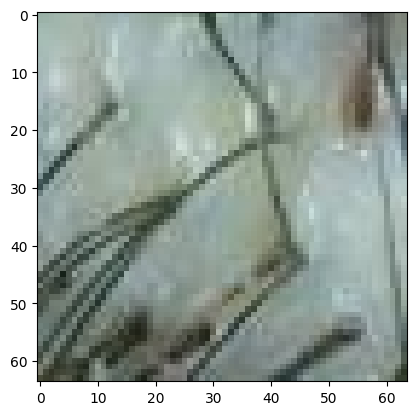

In [7]:
test_img = Image.open(img_names[0])
print(test_img.size)
plt.imshow(test_img)
plt.show()   #width, height

2    3797
3     836
0     534
Name: value_6, dtype: int64


<AxesSubplot: >

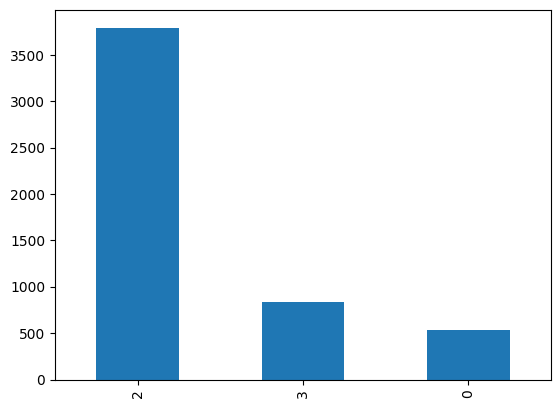

In [8]:
cnt_by_id=df['value_6'].value_counts()
print(cnt_by_id)    #0 = 정상, 3=탈모
cnt_by_id.plot.bar()

Int64Index([4414, 5023, 4764, 4646, 4725, 5032, 4958, 4637, 4388, 4523,
            ...
            4347, 4896, 4693, 4451, 4678, 4606, 5060, 4980, 5135, 4501],
           dtype='int64', length=302)
Int64Index([1575, 2557, 2640, 1590, 2722, 2059, 3122, 3939, 2747, 3574,
            ...
            3817,  725, 3910, 2602, 3073, 2479, 3873, 1386, 3600, 2329],
           dtype='int64', length=3263)
0    534
2    534
3    534
Name: value_6, dtype: int64


<AxesSubplot: >

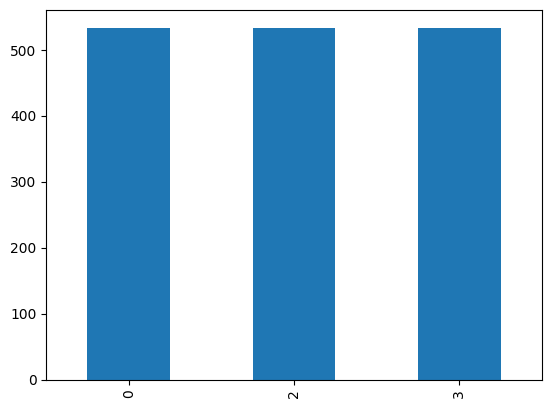

In [9]:
idx_1 = df[df['value_6'] == 3] #.index
idx_1 = idx_1.sample(n = 302).index
print(idx_1)

idx_2 = df[df['value_6'] == 2] #.index
idx_2 = idx_2.sample(n = 3263).index
print(idx_2)

df = df.drop(idx_1)
df = df.drop(idx_2)

cnt_by_id=df['value_6'].value_counts()
print(cnt_by_id)
cnt_by_id.plot.bar()

In [10]:
import scipy
import skimage.transform
from keras.models import load_model
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.utils import to_categorical

In [11]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['value_6'])
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['value_6'])

print("Train set rows: {}".format(train_df.shape[0]))
print("Test  set rows: {}".format(test_df.shape[0]))
print("Val   set rows: {}".format(val_df.shape[0]))

Train set rows: 1024
Test  set rows: 321
Val   set rows: 257


In [12]:
IMAGE_PATH = "./"

def read_image(img_file):
    # print('Trained:' , img_file)
    image = skimage.io.imread(IMAGE_PATH+img_file)
    image1 = skimage.transform.resize(image, (64, 64), mode='reflect')
    # print(image1[:, :, :3])
    return image1[:,:,:3]

In [13]:
def categories_encoder(dataset, var='value_6'):
    X = np.stack(dataset['image_dir'].apply(read_image))  #경로
    y = pd.get_dummies(dataset[var], drop_first=False)  #대조군
    # print(y)
    return X, y

In [14]:
X_train, y_train = categories_encoder(train_df)
X_val, y_val = categories_encoder(val_df)
X_test, y_test = categories_encoder(test_df)

In [15]:
model = tf.keras.models.Sequential()
# conv 1
model.add(tf.keras.layers.Conv2D(64,3,padding='same',activation='relu',input_shape=(64,64,3)))
model.add(tf.keras.layers.Dropout(rate=0.5))                          #  DO1
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# conv 2
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))                          # DO2
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# conv 3
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))                           # DO3
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# dense layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                    

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
train_data = np.array(X_train)/255
test_data = np.array(X_test)/255

train_labels = np.array(y_train).reshape(-1,1)
test_labels = np.array(y_test).reshape(-1,1)

In [18]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

X_train: (1024, 64, 64, 3)
y_train: (1024, 3)
X_test: (321, 64, 64, 3)
y_test: (321, 3)
X_val: (257, 64, 64, 3)
y_val: (257, 3)


In [19]:
saved_model = './files/digit_cnn3_model.h5'
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5,restore_best_weights=True)
mc = tf.keras.callbacks.ModelCheckpoint(saved_model, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [20]:
from keras.callbacks import EarlyStopping 
# early_stopping = EarlyStopping(patience = 4, verbose=1)

train_model1 = model.fit(X_train, y_train, epochs=10,
                            callbacks=[es, mc],
                            validation_data=(X_val, y_val))

# model.load_weights('best_model1.h5')

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 1.1663 - accuracy: 0.3809
Epoch 1: val_accuracy improved from -inf to 0.56809, saving model to ./files\digit_cnn3_model.h5
32/32 [==============================] - 7s 198ms/step - loss: 1.1663 - accuracy: 0.3809 - val_loss: 1.0808 - val_accuracy: 0.5681
Epoch 2/10
32/32 [==============================] - ETA: 0s - loss: 0.8786 - accuracy: 0.5908
Epoch 2: val_accuracy improved from 0.56809 to 0.65370, saving model to ./files\digit_cnn3_model.h5
32/32 [==============================] - 7s 207ms/step - loss: 0.8786 - accuracy: 0.5908 - val_loss: 0.9721 - val_accuracy: 0.6537
Epoch 3/10
32/32 [==============================] - ETA: 0s - loss: 0.7932 - accuracy: 0.6094
Epoch 3: val_accuracy did not improve from 0.65370
32/32 [==============================] - 7s 204ms/step - loss: 0.7932 - accuracy: 0.6094 - val_loss: 0.9602 - val_accuracy: 0.6459
Epoch 4/10
32/32 [==============================] - ETA: 0s - loss: 0.7551 - 

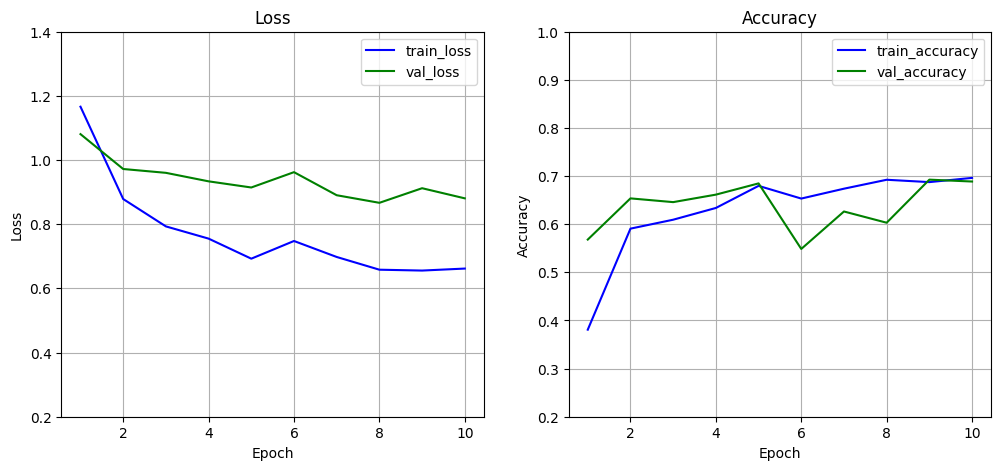

In [21]:
loss = train_model1.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(epochs, train_model1.history['loss'], 'b', label='train_loss')
plt.plot(epochs, train_model1.history['val_loss'], 'g', label='val_loss')
plt.ylim([0.2,1.4])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(epochs, train_model1.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, train_model1.history['val_accuracy'], 'g', label='val_accuracy')
plt.ylim([0.2,1])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()